In [85]:
import pandas as pd
sentiment_data = pd.read_csv("sentiment_data_v2.csv")
sentiment_data.head()

,date,product_review,user_rating,compound_score,sentiment
0,9/30/2024,✅ Trip Verified | Air India staff at Pune does...,1.0,-0.6901,-1
1,9/26/2024,✅ Trip Verified | It seems that on the early m...,8.0,0.9020,1
2,9/25/2024,✅ Trip Verified | I flew from Sydney to Delhi ...,1.0,-0.7551,-1
3,9/24/2024,✅ Trip Verified | Had a flight on 31 August ...,1.0,0.9408,1
4,9/19/2024,Not Verified | AI 106 (04/13/2024) 101 (04/23/...,2.0,-0.9604,-1


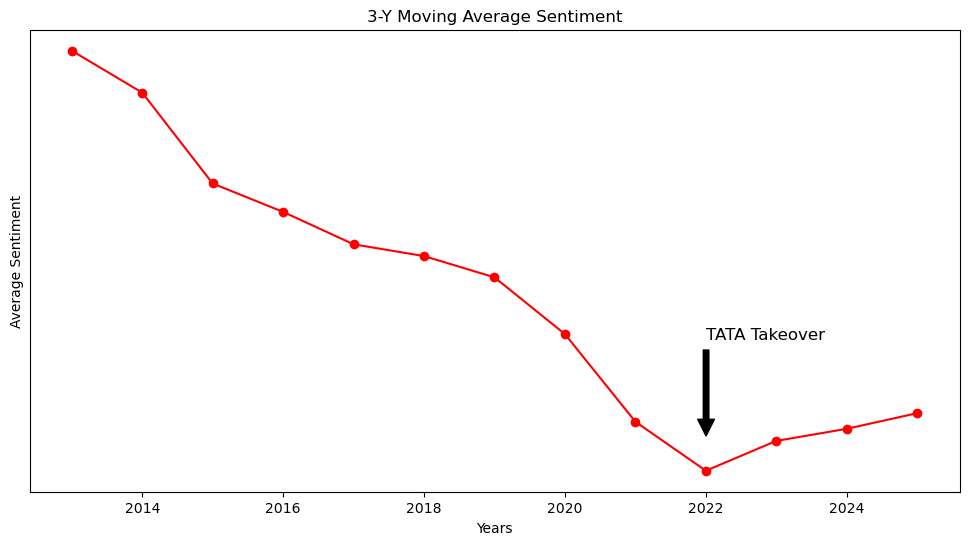

In [86]:
sentiment_data['date'] = pd.to_datetime(sentiment_data['date'], format='%m/%d/%Y')

semi_annual_sentiment = sentiment_data.resample('1Y', on='date')['sentiment'].mean()

moving_avg = semi_annual_sentiment.rolling(window=3, min_periods=2).mean()

import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

plt.figure(figsize=(12,6))
# plt.plot(semi_annual_sentiment.index, semi_annual_sentiment, marker='o', linestyle='-', color='b', label='Annual Avg Sentiment')
plt.plot(moving_avg.index, moving_avg, marker='o', linestyle='-', color='r', label='Moving Average (3 periods)')

takeover_date = pd.Timestamp('2022-01-01')
takeover_value = moving_avg.loc['2022']

plt.annotate('TATA Takeover', xy=(takeover_date, takeover_value), xytext=(takeover_date, takeover_value + 0.25),
             arrowprops=dict(facecolor='black', shrink=0.05), fontsize=12)

plt.title('3-Y Moving Average Sentiment')
plt.xlabel('Years')
plt.ylabel('Average Sentiment')
# plt.grid(True)
# plt.legend()
plt.yticks([])
plt.show()


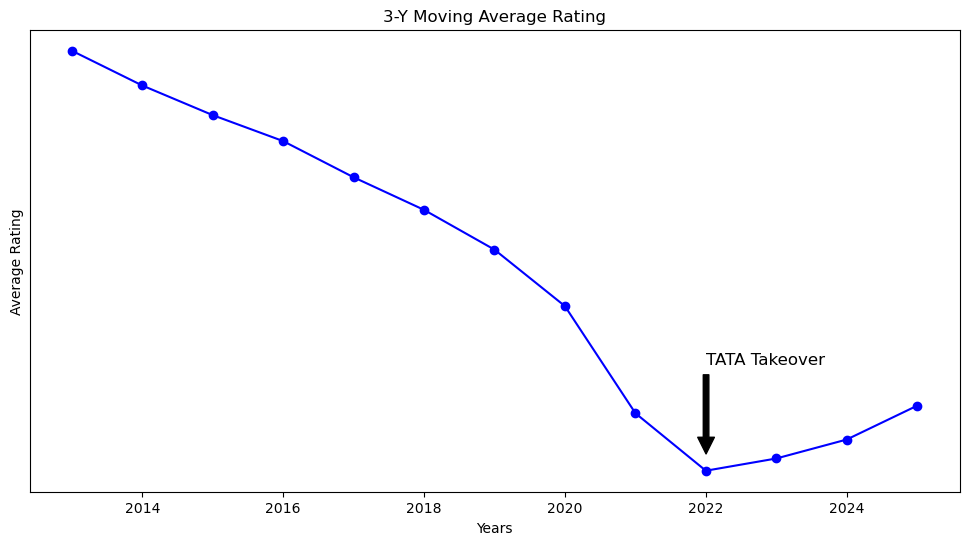

In [87]:
sentiment_data['date'] = pd.to_datetime(sentiment_data['date'], format='%m/%d/%Y')

annual_rating = sentiment_data.resample('1Y', on='date')['user_rating'].mean()

moving_avg = annual_rating.rolling(window=3, min_periods=2).mean()

import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

plt.figure(figsize=(12,6))
# plt.plot(semi_annual_sentiment.index, semi_annual_sentiment, marker='o', linestyle='-', color='b', label='Annual Avg Sentiment')
plt.plot(moving_avg.index, moving_avg, marker='o', linestyle='-', color='b', label='Moving Average (3 periods)')

takeover_date = pd.Timestamp('2022-01-01')
takeover_value = moving_avg.loc['2022']

plt.annotate('TATA Takeover', xy=(takeover_date, takeover_value), xytext=(takeover_date, takeover_value + 1),
             arrowprops=dict(facecolor='black', shrink=0.05), fontsize=12)

plt.title('3-Y Moving Average Rating')
plt.xlabel('Years')
plt.ylabel('Average Rating')
# plt.grid(True)
# plt.legend()
plt.yticks([])
plt.show()
